In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandals",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

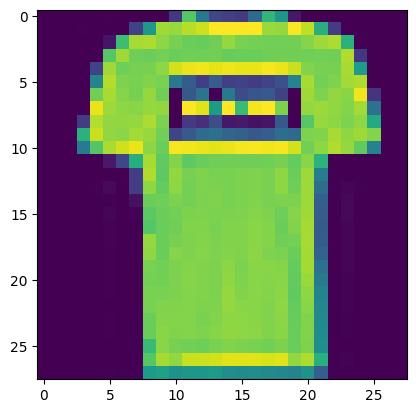

In [ ]:
plt.imshow(x_train[1])
plt.show()

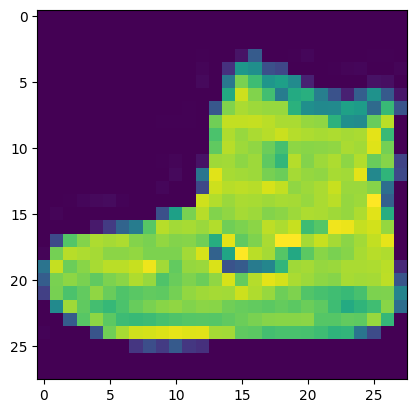

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
print(x_train.shape)  # (60000, 28, 28, 1)
print(x_test.shape)   # (10000, 28, 28, 1)
print(y_train.shape)  # (60000,)
print(y_test.shape)   # (10000,)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3,3), activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.7058 - loss: 0.7863 - val_accuracy: 0.8551 - val_loss: 0.3883
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.8573 - loss: 0.3870 - val_accuracy: 0.8835 - val_loss: 0.3179
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.8802 - loss: 0.3256 - val_accuracy: 0.8907 - val_loss: 0.2945
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.8890 - loss: 0.2999 - val_accuracy: 0.8966 - val_loss: 0.2860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.8964 - loss: 0.2806 - val_accuracy: 0.9004 - val_loss: 0.2657
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.8985 - loss: 0.2701 - val_accuracy: 0.9005 - val_loss: 0.2744
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9059 - loss: 0.2505 - val_accuracy: 0.9055 - val_loss: 0.2559
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.9082 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9094 - loss: 0.2616
Test accuracy: 0.9099000096321106
